# The curse of dimensionality

These notes follow [The Elements of Statistical Learning](https://web.stanford.edu/~hastie/Papers/ESLII.pdf) Chapter 2 Section 5, here referred to as HTF.

The curse of dimensionality expresses the fact that the geometry of high dimensional Euclidean space is quite different from what we expect based on our low dimensional experience, and as a result methods that are based on "distance" face challenges in high dimenions.

Let's start by looking at the sphere in $d$-dimensional Euclidean space.  Imagine choosing a point uniformly at random in that sphere.  How far from the origin is that point?

"Uniformly at random" means that the probability density of a point being at distance $r$ from zero is proportional to the volume of the infinitesimal shell at distance $r$.  In the unit $d$ sphere, this volume is proportional to $r^{d-1}$, and normalizing this over
the interval $[0,1]$ gives us that the probability density is
$P(r)=dr^{d-1}$.

Let's take a look at this.


In [38]:
import numpy as np
from numpy.random import uniform
import matplotlib.pyplot as plt
plt.style.use('seaborn')

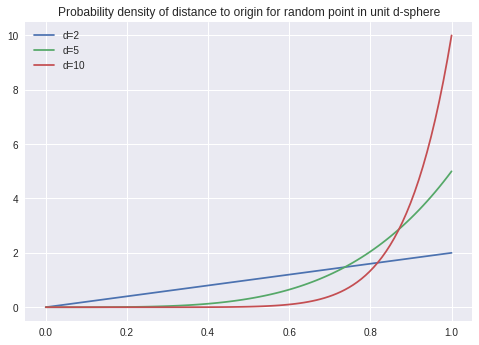

In [43]:
x = np.linspace(0,1,100)
for d in [2,5,10]:
    y = d*x**(d-1)
    plt.plot(x,y,label="d={}".format(d))

plt.title('Probability density of distance to origin for random point in unit d-sphere')
_=plt.legend()

As the graph above shows, in high dimensions, randomly chosen points in the d-sphere are much more likely to be close to the boundary of the sphere than they are to center.

Imagine, therefore, that you are trying to classify an unknown point by finding the closest point whose class is known.  That closest point is probably going to be pretty far away.

To look a little more closely, suppose you choose $N$ points, uniformly at random, from the unit $d$ sphere, and then take the closest point among these $N$.   Where does this point lie? 

One way to look at this is to ask for the median of the distribution of "closest point among $N$ uniformly chosen points in the unit sphere of dimension $d$".

To compute this, start by asking: what is the chance that the closest of the $N$ points is at distance at least $r$ from zero?
In other words, what is the chance that $N$ independent choices lie outside of the sphere of radius $r$?  

Since the probability of a single point lying outside the sphere of  radius $r$ is $(1-r^{d})$ by the result up above, the probability of $N$ points lying outside is $P=(1-r^{d})^{N}$.

The median distance is the radius so that this probability is $.5$.
$$
.5 = (1-r^{d})^{N}
$$
or
$$
r = (1-(.5)^{1/N})^{1/d}
$$



As the graph below shows, in 20 dimensions, even with  1000 points, the median distance is more than 1/2.

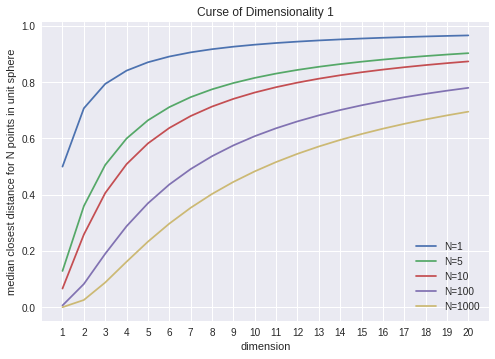

In [77]:
x = np.array(range(1,21))
for N in [1,5,10,100,1000]:
    y = (1-(.5)**(1/N))**(1/x)
    _=plt.plot(x,y,label="N={}".format(N))
plt.xticks(range(1,21))
plt.xlabel('dimension')
plt.ylabel('median closest distance for N points in unit sphere')
plt.title('Curse of Dimensionality 1')
_=plt.legend()



HTF propose the following experiment.  Suppose that our data consists of 1000 points chosen uniformly at random from the $p$-dimensional hypercube $[-1,1]^{p}$ and, for each point, a value $Y$. This is our "training data".  Our goal is to predict $Y$ for another point in the hypercube (our "test data").  Finally suppose that in fact
$$
Y = e^{-8\|x\|^2}
$$
where $\|x\|^2$ is the usual Euclidean distance.

A very simple way to do this prediction is by the "1-nearest neighbor rule": given a point $x_0$ in the hypercube, choose the point $x$ in the training set closest to $x_0$ and predict that
$f(x_0)=f(x)$.

To be completely concrete, choose $x_0$ to be the origin.  So
our "predicted y-value" for a given data set is
$$
Y(x)=e^{-8\|x\|}
$$
where $x$ is the point in the training set closest to the origin.

Notice that this value is going to be the maximum of $Y(x)$ over
all $x$ in the training set, and, of course, the true value of
$Y$ at the origin is $1$.

Here is a simulation of this situation.


In [110]:
def nn_predict(dim=10):
    # choose 1000 points from the hypercube
    d = uniform(-1,1,size=(1000,dim))
    Ymax = np.max(np.exp(-8*np.linalg.norm(d,axis=1)**2))
    return Ymax 

Text(0, 0.5, 'Average predicted value using nearest neighbor')

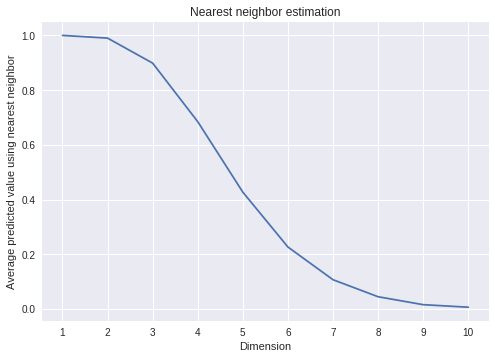

In [111]:
plt.plot(range(1,11),[np.mean([nn_predict(dim=k) for i in range(1000)]) for k in range(1,11)])
_=plt.xticks(range(1,11))
plt.title('Nearest neighbor estimation')
plt.xlabel('Dimension')
plt.ylabel('Average predicted value using nearest neighbor')

HTF analyze this situation in terms of bias and variance and mean squared error MSE.  The MSE of the prediction at $x_0$ (which is 0 in our case) is the average over the "training sets" of
the difference $(f(x_0)-\hat{y}_0)^2$ where $\hat{y}_0$ is the
predicted value (which is $f(x)$ where $x$ is the closest point to zero in our case).

The term $f(x_0)-\hat{y}_0$ can be split up:
$$
f(x_0)-E(\hat{y}_0)+E(\hat{y}_0)-\hat{y}_0
$$
where $E(\hat{y}_0)$ is the average, over all training sets,
of the predicted value -- we estimated this up above.

Using the fact that $f(x_0)$ is a constant (in fact, it is equal to $1$) and that $E(E(\hat{y}_0))=E(\hat{y}_0)$, we get
the decomposition
$$
MSE = E[f(x_0)-\hat{y}_0]^2 = E[\hat{y}_0-E(\hat{y}_0)]^2 + (E(\hat{y_0})-f(x_0))^2.
$$
The first term here is the variance in the predicted values about the mean predicted value; and the second term is the square of the   *bias* which is the difference between the expected predicted value and the true  value. 

We can simulate the MSE as well; it's just the average of 
$(1-\hat{y}_0)^2$ over the choices of training sets.

In [112]:
def MSE(dim=10,N=100):
    return np.mean([(1-nn_predict(dim))**2 for i in range(N)])

Text(0, 0.5, 'MSE')

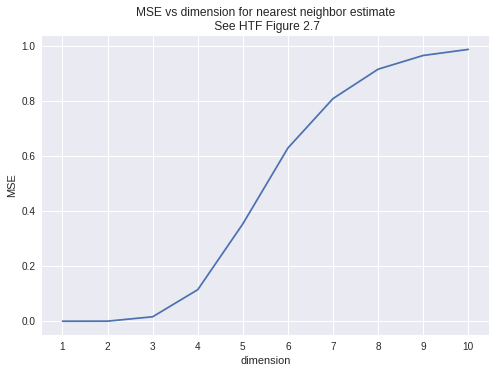

In [117]:
plt.plot(range(1,11),[MSE(dim=x,N=1000) for x in range(1,11)])
_=plt.xticks(range(1,11))
_=plt.title("MSE vs dimension for nearest neighbor estimate\n See HTF Figure 2.7")
plt.xlabel("dimension")
plt.ylabel("MSE")